# Stock Market Analysis

This notebook takes a look at stock prices from Tesla, Volkswagen and especially Mercedes-Benz.

**Basic Analysis**

In [58]:
import pandas as pd 
from pandas import Series,DataFrame
import numpy as np
from scipy.stats.stats import pearsonr  

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline 

In [ ]:
import pandas_datareader as pdr

In [ ]:
from datetime import datetime

In [ ]:
# Daimler, Volkswagen, Tesla
tech_list= ['DDAIF','VLKAF','TSLA']

In [ ]:
# End-> today, start-> year ago
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [ ]:
# Store stock numbers in global variable
for stock in tech_list:
    globals()[stock] = pdr.get_data_yahoo(stock,start,end)

In [10]:
# Let's take a look at one of the DataFrames 
DDAIF.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,56.148413,55.368135,55.791548,55.776706,62254.067460,53.514551
std,4.936139,4.883281,4.908610,4.919495,44668.459908,3.649310
min,45.540001,44.799999,45.250000,44.930000,15700.000000,44.930000
25%,52.757499,52.114999,52.569999,52.517500,35300.000000,51.180764
50%,56.484999,55.670000,55.915001,56.045000,47250.000000,53.822517
75%,59.635001,58.672500,59.232501,59.147501,74325.000000,55.566809
max,67.199997,66.550003,66.870003,66.830002,358000.000000,62.588459


In [11]:
DDAIF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-10-11 to 2019-10-11
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


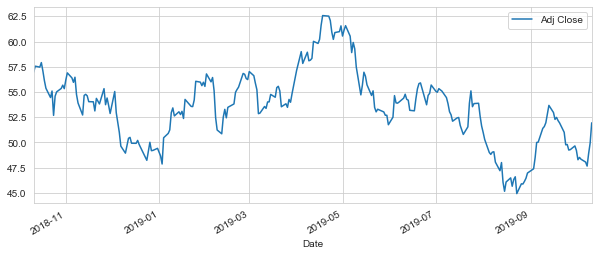

In [43]:
# Plot stock over it's closing price
DDAIF['Adj Close'].plot(legend=True,figsize=(10,4))

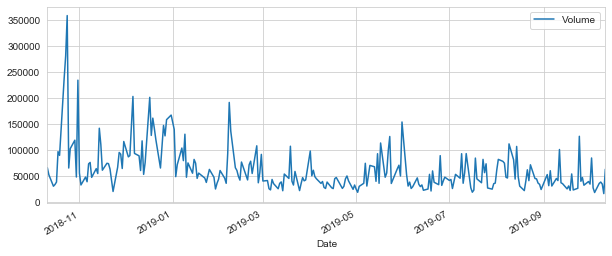

In [44]:
DDAIF['Volume'].plot(legend=True,figsize=(10,4))

Now we want to take a look at the moving average to get the noise out of the data.

In [47]:
# list for several moving averages
ma_day= [10,20,50]

for ma in ma_day:
    column_name = f'Ma for {ma} days'
    
    DDAIF[column_name] = DDAIF['Adj Close'].rolling(window=ma).mean()

In [48]:
DDAIF

,High,Low,Open,Close,Volume,Adj Close,Ma for 10 days,Ma for 20 days,Ma for 50 days,Daily Return
Date,,,,,,,,,,
2018-10-11,61.669998,60.299999,61.590000,60.840000,65600.0,56.978630,NaN,NaN,NaN,NaN
2018-10-12,62.029999,60.669998,61.910000,61.470001,51900.0,57.568645,NaN,NaN,NaN,0.010355
2018-10-15,61.680000,61.090000,61.380001,61.369999,29900.0,57.474991,NaN,NaN,NaN,-0.001627
2018-10-16,62.000000,61.470001,61.869999,61.849998,33100.0,57.924526,NaN,NaN,NaN,0.007821
2018-10-17,61.209999,60.430000,60.939999,60.970001,37900.0,57.100380,NaN,NaN,NaN,-0.014228
...,...,...,...,...,...,...,...,...,...,...
2019-10-07,48.320000,47.930000,48.029999,48.060001,35300.0,48.060001,49.019,50.6555,49.1544,-0.005792
2019-10-08,47.939999,47.330002,47.509998,47.660000,37900.0,47.660000,48.808,50.4595,49.0298,-0.008323
2019-10-09,49.150002,48.669998,49.029999,48.910000,34000.0,48.910000,48.719,50.3070,48.9556,0.026227


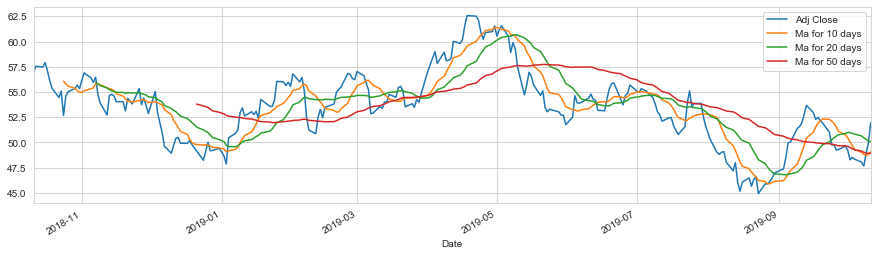

In [49]:
# Plot moving average over different period of time 
DDAIF[['Adj Close','Ma for 10 days','Ma for 20 days','Ma for 50 days']].plot(figsize=(15,4),legend=True)

**Daily Return Analysis**

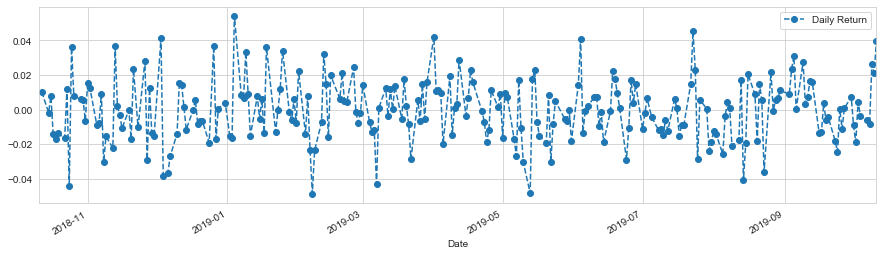

In [52]:
# Get the percent chnange of the stock
DDAIF['Daily Return']= DDAIF['Adj Close'].pct_change()
# Then plot the daily return percentage
DDAIF['Daily Return'].plot(figsize=(15,4),linestyle='--',marker='o',legend=True)

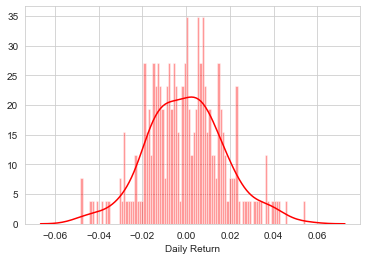

In [18]:
# Histogram and KDE-PLot on the daily return
sns.distplot(DDAIF['Daily Return'].dropna(),bins=100,color='red')

In [19]:
# Take all the closing prices into one DataFrame
closing_df = pdr.get_data_yahoo(tech_list,start,end)['Adj Close']

In [53]:
# Quick look
closing_df.head()

Symbols,DDAIF,VLKAF,TSLA
Date,,,
2018-10-11,56.978630,153.582474,252.229996
2018-10-12,57.568645,152.610443,258.779999
2018-10-15,57.474991,156.595810,259.589996
2018-10-16,57.924526,162.107285,276.589996
2018-10-17,57.100380,160.386765,271.779999


In [54]:
# Store the percent change in another DataFrame
tech_rets = closing_df.pct_change()

In [55]:
tech_rets

Symbols,DDAIF,VLKAF,TSLA
Date,,,
2018-10-11,NaN,NaN,NaN
2018-10-12,0.010355,-0.006329,0.025968
2018-10-15,-0.001627,0.026115,0.003130
2018-10-16,0.007821,0.035196,0.065488
2018-10-17,-0.014228,-0.010613,-0.017390
...,...,...,...
2019-10-07,-0.005792,-0.016423,0.027179
2019-10-08,-0.008323,0.001848,0.009801
2019-10-09,0.026227,0.006519,0.018663


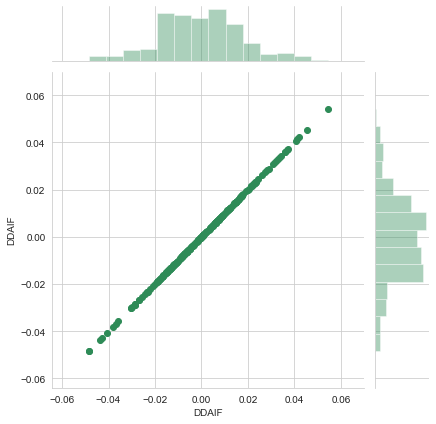

In [23]:
# By comparing Daimler to itself we see (of course) a perfect linear relationship
sns.jointplot('DDAIF','DDAIF',tech_rets,kind='scatter',color='seagreen')

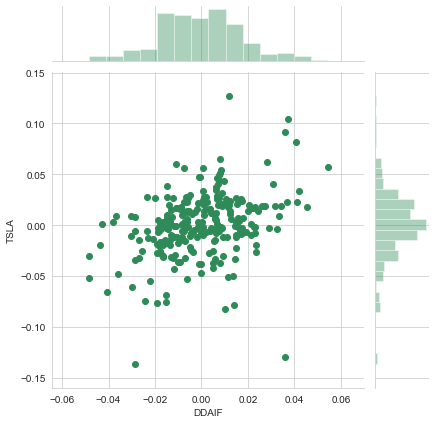

In [57]:
# So waht if we compare Mercedes to Tesla or Volkswagen ?
sns.jointplot('DDAIF','TSLA',tech_rets,kind='scatter',color='seagreen')

(0.6191988510185971, 5.80283034918825e-28)


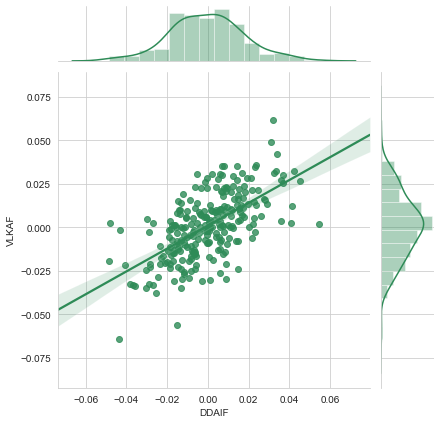

In [77]:
sns.jointplot('DDAIF','VLKAF',tech_rets,kind='reg',color='seagreen')
tech_rets=tech_rets.dropna()
print(pearsonr(tech_rets['DDAIF'],tech_rets['VLKAF']))

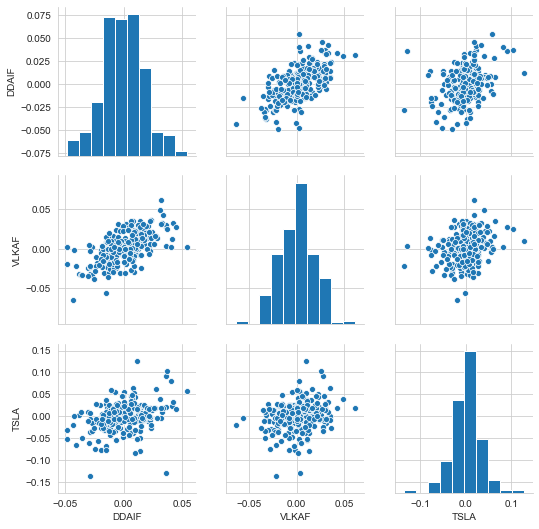

In [79]:
# With pairplot we get an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

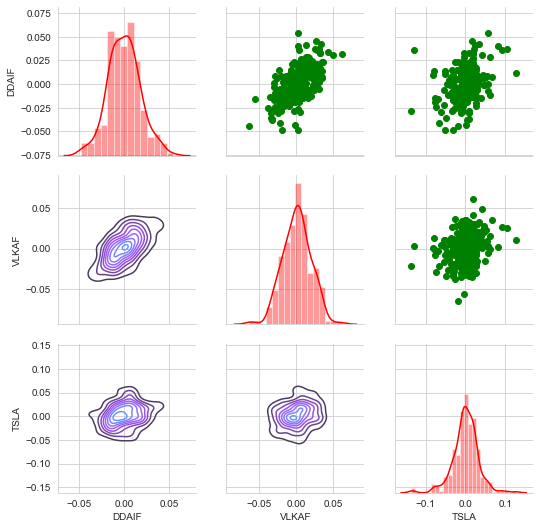

In [80]:
# Piatplot is also customisable
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='green')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(sns.distplot,color ='red')


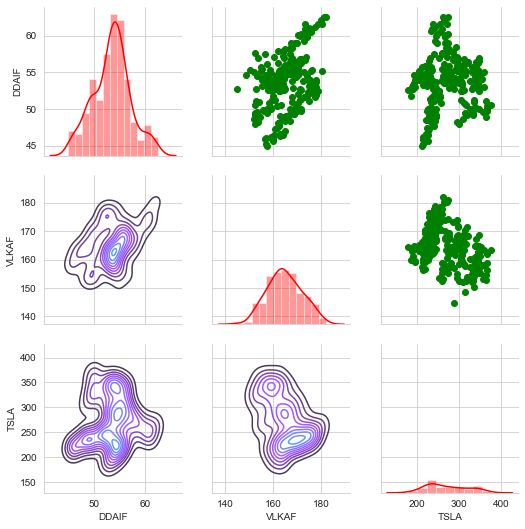

In [28]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter,color='green')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(sns.distplot,color ='red')


In [83]:
# Get the correaltions
coor = tech_rets.corr()

In [84]:
coor

Symbols,DDAIF,VLKAF,TSLA
Symbols,,,
DDAIF,1.000000,0.619199,0.355381
VLKAF,0.619199,1.000000,0.262419
TSLA,0.355381,0.262419,1.000000


In [86]:
rets = tech_rets.dropna()
print(rets)

Symbols        DDAIF     VLKAF      TSLA
Date                                    
2018-10-12  0.010355 -0.006329  0.025968
2018-10-15 -0.001627  0.026115  0.003130
2018-10-16  0.007821  0.035196  0.065488
2018-10-17 -0.014228 -0.010613 -0.017390
2018-10-18 -0.016894 -0.019273 -0.028957
...              ...       ...       ...
2019-10-07 -0.005792 -0.016423  0.027179
2019-10-08 -0.008323  0.001848  0.009801
2019-10-09  0.026227  0.006519  0.018663
2019-10-10  0.021468  0.021386  0.000859
2019-10-11  0.031825  0.061677  0.019204

[251 rows x 3 columns]


**Risk Analysis**

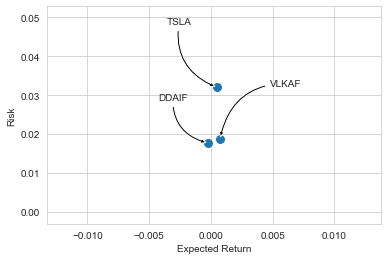

In [90]:
# One of the basic ways to quantify risk is by comparing the expected return with the standard deviation of the daily returns

area = np.pi*20
plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')
i =0
j =-1
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext =(j*50,50+i),
        textcoords = 'offset points', ha = 'left', va = 'top',
        arrowprops = dict(arrowstyle = 'simple', connectionstyle = 'arc3,rad=0.4',facecolor='black'))
    i =i+10
    j =j*(-1)

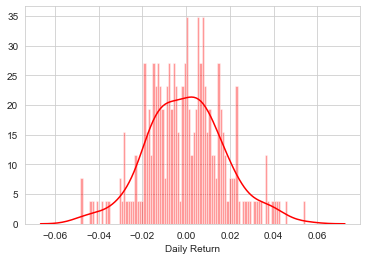

In [33]:
sns.distplot(DDAIF['Daily Return'].dropna(),bins=100,color='red')

In [102]:
# So we can use quantile to get the risk value for the stock
rets['DDAIF'].quantile(0.03)

-0.03309254519956756

The 0.03 quantile of daily return is at **-0.033**. So with **97%** confidence the worst daily loss will not exceed **3,3%**.

In [176]:
# Value at risk using Monte Carlo method
days = 365
dt = 1/days
mu = rets.mean()['DDAIF']
sigma = rets.std()['DDAIF']


In [177]:
def monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0]= start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x]=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        
        drift[x] = mu*dt
        
        price[x] = price[x-1]+(price[x-1]*(drift[x]+shock[x]))
        
    return price

In [184]:
start_price = 61.67

Text(0.5, 1.0, 'Monte Carlo Analysis for Mercedens Benz')

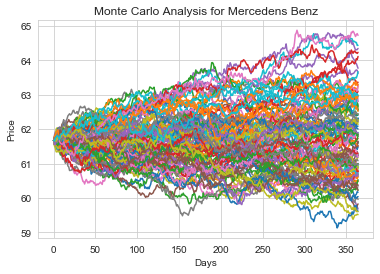

In [185]:
for run in range(100):
    plt.plot(monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Mercedens Benz')

In [186]:
# Let's go for a bigger run...
runs = 5000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run]= monte_carlo(start_price,days,mu,sigma)[days-1]

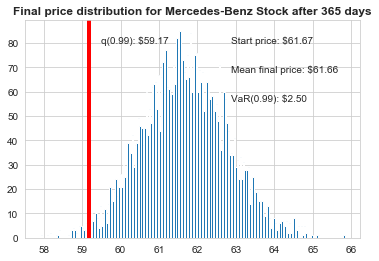

In [193]:
q = np.percentile(simulations,1)
plt.hist(simulations,bins=200)


plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())
# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))
# Display 1% quantile
plt.figtext(0.3, 0.8, "q(0.99): $%.2f" % q)
plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Mercedes-Benz Stock after %s days" % days, weight='bold');


